In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

warnings.filterwarnings("ignore")

In [3]:
pwd

'/Users/huichen/Documents/2_learning/0_sandbox/prog'

In [4]:
df = pd.read_csv("../data/ncr_ride_bookings.csv")

In [5]:
df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


In [6]:
df.shape

(150000, 21)

In [7]:
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [10]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

# 1 Data Preperation
 - 1.1 Drop unwanted columns and rows, maybe rename the column names
 - 1.2 Convert date type
 - 1.3 Handing missing value
 - 1.4 duplicate rows

## 1.1 Clean columns

### Make a copy of df

In [6]:
df1 = df.copy()

### Method 1, to select columns

In [15]:
df2 = df[['Date', 'Time', 'Booking ID']]  #copy the column list wanted inside the [[]]
df2.head()

,Date,Time,Booking ID
0,2024-03-23,12:29:38,"""CNR5884300"""
1,2024-11-29,18:01:39,"""CNR1326809"""
2,2024-08-23,08:56:10,"""CNR8494506"""
3,2024-10-21,17:17:25,"""CNR8906825"""
4,2024-09-16,22:08:00,"""CNR1950162"""


### Method 2: Drop unwanted columns

## a. Rename column names

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.rename(columns={'old_name': 'new_name'})

In [12]:
df.dtypes

date                                  object
time                                  object
booking_id                            object
booking_status                        object
customer_id                           object
vehicle_type                          object
pickup_location                       object
drop_location                         object
avg_vtat                             float64
avg_ctat                             float64
cancelled_rides_by_customer          float64
reason_for_cancelling_by_customer     object
cancelled_rides_by_driver            float64
driver_cancellation_reason            object
incomplete_rides                     float64
incomplete_rides_reason               object
booking_value                        float64
ride_distance                        float64
driver_ratings                       float64
customer_rating                      float64
payment_method                        object
dtype: object

## 1.2 Updating the columns by Datatype

### General Rules for These Conversions

#### 1.1.1 Count-like numeric features
Columns that represent counts of events (like cancelled rides, incomplete rides) should be stored as int.
Rationale: Counts are discrete whole numbers. Using integer dtype prevents weird decimals, reduces memory usage, and clarifies semantics.

#### 1.1.2 Dates and Times
Convert columns with calendar or clock values into datetime64[ns] (for dates) or datetime.time (for standalone times).
Rationale: This unlocks time-based operations like resampling, extracting day-of-week, filtering by ranges, and arithmetic on dates.

#### 1.1.3 Identifiers (alphanumeric IDs)
Columns like booking IDs and customer IDs that mix letters and numbers get cast to string.
Rationale: IDs aren’t quantities so don’t add or average them. Treating them as text prevents accidental math and keeps intent clear.

### 1.1.4 Statuses, categories, descriptive labels
Booking status, vehicle type, pickup/drop locations, reasons, payment methods should be string (or category if you want memory savings).
Rationale: hese are categorical descriptors, not free-text narratives. Casting ensures they’re handled consistently and ready for grouping, filtering, or encoding later.

#### Therefore, for our datatypes:
 - Numbers → int or float depending on whether decimals are needed i.e booking value
 - Categories → category
 - Dates → datetime64[ns]
 - Text → string

In [13]:
pd.to_datetime(df['date'])

0        2024-03-23
1        2024-11-29
2        2024-08-23
3        2024-10-21
4        2024-09-16
            ...    
149995   2024-11-11
149996   2024-11-24
149997   2024-09-18
149998   2024-10-05
149999   2024-03-10
Name: date, Length: 150000, dtype: datetime64[ns]

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['time'].head()

0    12:29:38
1    18:01:39
2    08:56:10
3    17:17:25
4    22:08:00
Name: time, dtype: object

In [16]:
df.dtypes

date                                 datetime64[ns]
time                                         object
booking_id                                   object
booking_status                               object
customer_id                                  object
vehicle_type                                 object
pickup_location                              object
drop_location                                object
avg_vtat                                    float64
avg_ctat                                    float64
cancelled_rides_by_customer                 float64
reason_for_cancelling_by_customer            object
cancelled_rides_by_driver                   float64
driver_cancellation_reason                   object
incomplete_rides                            float64
incomplete_rides_reason                      object
booking_value                               float64
ride_distance                               float64
driver_ratings                              float64
customer_rat

In [22]:
df['payment_method'].value_counts(dropna=False)

payment_method
NaN            48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

In [17]:
df['driver_cancellation_reason'].value_counts(dropna=False)

driver_cancellation_reason
NaN                                    123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64

In [18]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [19]:
df['booking_id'] = df['booking_id'].astype('string')
df['booking_status'] = df['booking_status'].astype('string')
df['customer_id'] = df['customer_id'].astype('string')
df['vehicle_type'] = df['vehicle_type'].astype('string')
df['pickup_location'] = df['pickup_location'].astype('string')
df['drop_location'] = df['drop_location'].astype('string')

In [20]:
df.dtypes

date                                 datetime64[ns]
time                                         object
booking_id                           string[python]
booking_status                       string[python]
customer_id                          string[python]
vehicle_type                         string[python]
pickup_location                      string[python]
drop_location                        string[python]
avg_vtat                                    float64
avg_ctat                                    float64
cancelled_rides_by_customer                 float64
reason_for_cancelling_by_customer            object
cancelled_rides_by_driver                   float64
driver_cancellation_reason                   object
incomplete_rides                            float64
incomplete_rides_reason                      object
booking_value                               float64
ride_distance                               float64
driver_ratings                              float64
customer_rat

## 1.3  Handling Missing values ('NaN')


### General Rules for these imputations

#### 1.2.1 Numeric continuous features (averages, distances, ratings, monetary values):
- Fill missing values with the mean of the column.
- Rationale: keeps the overall distribution stable without biasing toward zeros or extremes.

#### 1.2.2 Numeric count features (discrete events like cancellations, incomplete rides):
- Fill missing values with 0.
- Rationale: absence of a recorded event is assumed to mean “no event happened.”

#### 1.2.3 Categorical text features (statuses, reasons, methods):
- Fill missing values with a placeholder string (like "none") or the mode (most common value).
- Rationale: preserves category integrity without introducing NaN; "none" signals “no reason given,” while mode imputation reflects the dominant behavior in the data.

### how many missing value for each column

In [21]:
df.isna().sum()

date                                      0
time                                      0
booking_id                                0
booking_status                            0
customer_id                               0
vehicle_type                              0
pickup_location                           0
drop_location                             0
avg_vtat                              10500
avg_ctat                              48000
cancelled_rides_by_customer          139500
reason_for_cancelling_by_customer    139500
cancelled_rides_by_driver            123000
driver_cancellation_reason           123000
incomplete_rides                     141000
incomplete_rides_reason              141000
booking_value                         48000
ride_distance                         48000
driver_ratings                        57000
customer_rating                       57000
payment_method                        48000
dtype: int64

In [22]:
df['cancelled_rides_by_customer'].value_counts(dropna=False)

cancelled_rides_by_customer
NaN    139500
1.0     10500
Name: count, dtype: int64

In [23]:
df['cancelled_rides_by_customer'] = df['cancelled_rides_by_customer'].fillna(0)
df['cancelled_rides_by_customer'] = df['cancelled_rides_by_customer'].astype('int')
df['cancelled_rides_by_customer'].value_counts()

cancelled_rides_by_customer
0    139500
1     10500
Name: count, dtype: int64

In [24]:
df['reason_for_cancelling_by_customer'].value_counts(dropna=False)

reason_for_cancelling_by_customer
NaN                                             139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64

In [25]:
df['reason_for_cancelling_by_customer'] = df['reason_for_cancelling_by_customer'].fillna('none')
df['reason_for_cancelling_by_customer'] = df['reason_for_cancelling_by_customer'].astype('string')
df['reason_for_cancelling_by_customer'].value_counts(dropna=False)

reason_for_cancelling_by_customer
none                                            139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: Int64

In [26]:
df['reason_for_cancelling_by_customer'].dtypes

string[python]

In [27]:
df['cancelled_rides_by_driver'].value_counts(dropna=False)

cancelled_rides_by_driver
NaN    123000
1.0     27000
Name: count, dtype: int64

In [28]:
df['cancelled_rides_by_driver'] = df['cancelled_rides_by_driver'].fillna(0).astype('int')
df['cancelled_rides_by_driver'].value_counts()

cancelled_rides_by_driver
0    123000
1     27000
Name: count, dtype: int64

In [29]:
df['driver_cancellation_reason'].value_counts(dropna=False)

driver_cancellation_reason
NaN                                    123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64

In [30]:
df['driver_cancellation_reason'] = df['driver_cancellation_reason'].fillna('none').astype('string')
df['driver_cancellation_reason'].value_counts()

driver_cancellation_reason
none                                   123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: Int64

In [31]:
df['incomplete_rides'].value_counts()

incomplete_rides
1.0    9000
Name: count, dtype: int64

In [32]:
df['incomplete_rides'] = df['incomplete_rides'].fillna(0).astype('int')
df['incomplete_rides'].value_counts()

incomplete_rides
0    141000
1      9000
Name: count, dtype: int64

In [33]:
df['incomplete_rides'].value_counts()

incomplete_rides
0    141000
1      9000
Name: count, dtype: int64

In [34]:
df['incomplete_rides'] = df['incomplete_rides'].fillna('none').astype('string')
df['incomplete_rides'].value_counts()

incomplete_rides
0    141000
1      9000
Name: count, dtype: Int64

In [35]:
df['payment_method'].value_counts(dropna=False)

payment_method
NaN            48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

In [36]:
df['payment_method'] = df['payment_method'].fillna('none').astype('string')
df['payment_method'].value_counts()

payment_method
none           48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: Int64

In [37]:
df.isnull().sum()

date                                      0
time                                      0
booking_id                                0
booking_status                            0
customer_id                               0
vehicle_type                              0
pickup_location                           0
drop_location                             0
avg_vtat                              10500
avg_ctat                              48000
cancelled_rides_by_customer               0
reason_for_cancelling_by_customer         0
cancelled_rides_by_driver                 0
driver_cancellation_reason                0
incomplete_rides                          0
incomplete_rides_reason              141000
booking_value                         48000
ride_distance                         48000
driver_ratings                        57000
customer_rating                       57000
payment_method                            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  object        
 2   booking_id                         150000 non-null  string        
 3   booking_status                     150000 non-null  string        
 4   customer_id                        150000 non-null  string        
 5   vehicle_type                       150000 non-null  string        
 6   pickup_location                    150000 non-null  string        
 7   drop_location                      150000 non-null  string        
 8   avg_vtat                           139500 non-null  float64       
 9   avg_ctat                           102000 non-null  float64       
 10  cancelled_rides_by_c

In [39]:
df.groupby(['booking_status', 'incomplete_rides']).size()

booking_status         incomplete_rides
Cancelled by Customer  0                   10500
Cancelled by Driver    0                   27000
Completed              0                   93000
Incomplete             1                    9000
No Driver Found        0                   10500
dtype: int64

In [40]:
df[['booking_status', 'incomplete_rides']].value_counts()

booking_status         incomplete_rides
Completed              0                   93000
Cancelled by Driver    0                   27000
Cancelled by Customer  0                   10500
No Driver Found        0                   10500
Incomplete             1                    9000
Name: count, dtype: int64

## 1.4 Handling duplicate rows
 - drop_duplicates(), keep the 1st occurrence by default
 - df.drop_duplicates(keep='last'), keep last
 - drop_dupliates(subset=['col1', 'col2']) drop all

In [41]:
df.loc[df.duplicated()]

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method


In [42]:
df.duplicated(subset=['booking_id']).sum()

np.int64(1233)

In [43]:
df.loc[df.duplicated(subset=['booking_id'])]  #display duplicated rows 2

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
5522,2024-03-10,19:55:06,"""CNR5071968""",No Driver Found,"""CID6309096""",Auto,Kanhaiya Nagar,India Gate,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
7762,2024-03-01,11:55:56,"""CNR8512595""",Completed,"""CID9741888""",Go Mini,Narsinghpur,Huda City Centre,3.5,15.4,0,none,0,none,0,NaN,187.0,41.45,4.4,4.2,Credit Card
9587,2024-12-17,19:19:02,"""CNR1029172""",Completed,"""CID6382731""",Auto,Inderlok,Laxmi Nagar,6.9,34.4,0,none,0,none,0,NaN,332.0,36.38,4.3,4.3,UPI
9726,2024-05-23,20:44:27,"""CNR7132372""",Completed,"""CID6950827""",Go Sedan,Kalkaji,Sushant Lok,3.8,18.3,0,none,0,none,0,NaN,389.0,44.95,3.7,4.2,UPI
10186,2024-12-14,21:15:59,"""CNR7768664""",Completed,"""CID4473762""",eBike,Anand Vihar ISBT,Netaji Subhash Place,5.1,42.1,0,none,0,none,0,NaN,357.0,17.03,4.2,4.2,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149785,2024-12-15,22:45:40,"""CNR5629984""",Cancelled by Driver,"""CID8254113""",Auto,Vaishali,Anand Vihar ISBT,10.1,NaN,0,none,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,none
149828,2024-02-17,15:26:19,"""CNR9026484""",Cancelled by Driver,"""CID2050215""",Premier Sedan,Noida Film City,Paharganj,8.9,NaN,0,none,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,none
149928,2024-08-02,17:05:31,"""CNR8005057""",Cancelled by Customer,"""CID4600342""",Go Mini,Chirag Delhi,Shastri Nagar,15.2,NaN,1,Change of plans,0,none,0,NaN,NaN,NaN,NaN,NaN,none
149938,2024-06-16,21:34:30,"""CNR8099403""",Cancelled by Customer,"""CID8169380""",Auto,Adarsh Nagar,Udyog Bhawan,7.8,NaN,1,Change of plans,0,none,0,NaN,NaN,NaN,NaN,NaN,none


In [44]:
df.query('booking_id == "CNR7132372"')  value contains double quote, so it wont work

SyntaxError: invalid syntax (3409839714.py, line 1)

In [45]:
df.query('booking_id == \'\"CNR5071968\"\'')    # method 1

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
317,2024-10-10,03:56:19,"""CNR5071968""",Completed,"""CID7384045""",Go Sedan,Panchsheel Park,Yamuna Bank,4.7,42.5,0,none,0,none,0,NaN,473.0,48.35,4.7,3.8,Cash
5522,2024-03-10,19:55:06,"""CNR5071968""",No Driver Found,"""CID6309096""",Auto,Kanhaiya Nagar,India Gate,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none


In [46]:
df[df['booking_id'] == '"CNR5071968"'].sort_values(by='date')  # method 2

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
5522,2024-03-10,19:55:06,"""CNR5071968""",No Driver Found,"""CID6309096""",Auto,Kanhaiya Nagar,India Gate,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
317,2024-10-10,03:56:19,"""CNR5071968""",Completed,"""CID7384045""",Go Sedan,Panchsheel Park,Yamuna Bank,4.7,42.5,0,none,0,none,0,NaN,473.0,48.35,4.7,3.8,Cash


In [47]:
df.duplicated(subset=['booking_id']).sum()   #count duplicated rows

np.int64(1233)

In [48]:
df = df.loc[~df.duplicated(subset=['booking_id'])].reset_index(drop=True).copy() #remove duplicated rows on Booking ID, because dropping rows, will mess up index, need to reset_index()

## 1.5 Save data 

In [49]:
df.shape

(148767, 21)

# 2 Feature Understanding

## Univariate Analysis - Plot Feature Distribution
    - Histogram
    - KDE
    - Boxplot

## 2.1 Bar plot
 - plot on discrete value, compare the value across categories

In [50]:
df['booking_status'].value_counts(dropna=False)  # value_counts() automatically order from most to least

booking_status
Completed                92248
Cancelled by Driver      26789
Cancelled by Customer    10402
No Driver Found          10401
Incomplete                8927
Name: count, dtype: Int64

In [95]:
df['col'].value_counts() \  # Sample: if too many unique values, choose top 10 then plot, use '\' to continue to the following line
    .head(10) \
    .plot

SyntaxError: incomplete input (1362299285.py, line 1)

Text(0, 0.5, 'number of rides')

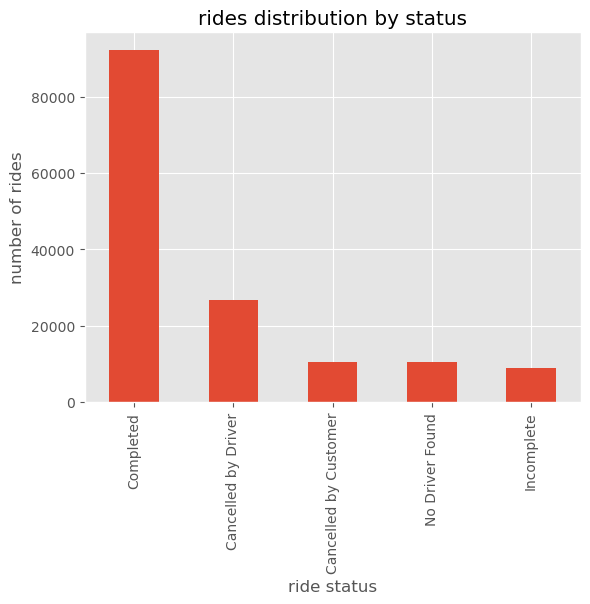

In [51]:
axv = df['booking_status'].value_counts().plot(kind= 'bar', title='rides distribution by status') # choose bar plot
axv.set_xlabel('ride status')
axv.set_ylabel('number of rides')

Text(0, 0.5, 'ride status')

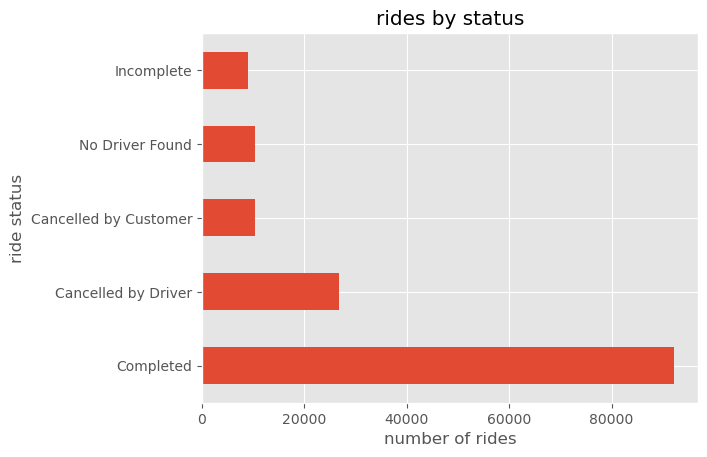

In [52]:
ax = df['booking_status'].value_counts().plot(kind='barh', title='rides by status')  # barh for horizontal, save the plot to ax, then add xlabel, ylable
ax.set_xlabel('number of rides')
ax.set_ylabel('ride status')

In [53]:
df['vehicle_type'].value_counts(dropna=False)

vehicle_type
Auto             37129
Go Mini          29556
Go Sedan         26934
Bike             22318
Premier Sedan    17950
eBike            10458
Uber XL           4422
Name: count, dtype: Int64

Text(0, 0.5, 'nbr of vehicles')

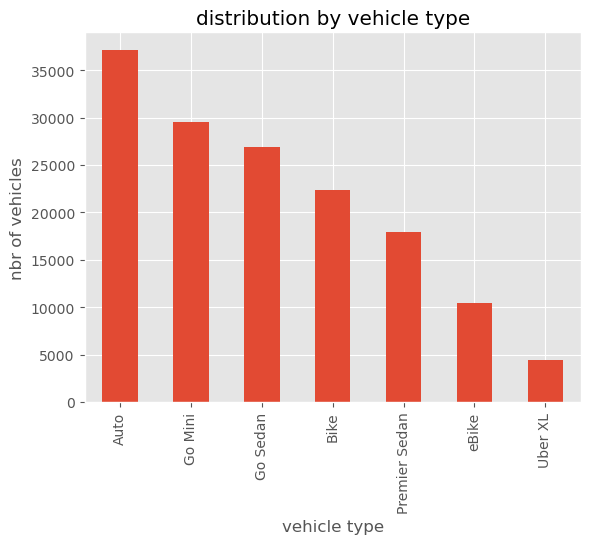

In [54]:
ax=df['vehicle_type'].value_counts().plot(kind='bar', title='distribution by vehicle type')
ax.set_xlabel('vehicle type')
ax.set_ylabel('nbr of vehicles')

In [57]:
df.head(3)

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card


## 2.2 Histgram
 - show distribution for continuous value

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148767 entries, 0 to 148766
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               148767 non-null  datetime64[ns]
 1   time                               148767 non-null  object        
 2   booking_id                         148767 non-null  string        
 3   booking_status                     148767 non-null  string        
 4   customer_id                        148767 non-null  string        
 5   vehicle_type                       148767 non-null  string        
 6   pickup_location                    148767 non-null  string        
 7   drop_location                      148767 non-null  string        
 8   avg_vtat                           138366 non-null  float64       
 9   avg_ctat                           101175 non-null  float64       
 10  cancelled_rides_by_c

In [56]:
df_vtat = df[['avg_vtat']].dropna()

In [57]:
len(df_vtat)

138366

In [58]:
df_vtat.head(3)

,avg_vtat
1,4.9
2,13.4
3,13.1


Text(0.5, 0, 'avg time for driver to reach pickup loction in min')

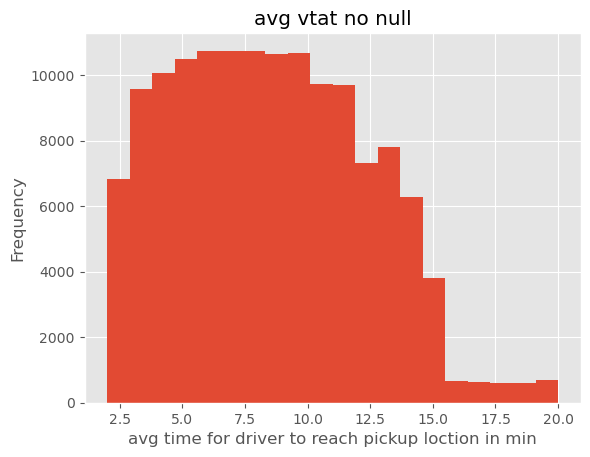

In [59]:
ax = df_vtat['avg_vtat'].plot(kind='hist', bins=20, title='avg vtat no null')
ax.set_xlabel('avg time for driver to reach pickup loction in min')

## 2.3 Density plot
    - 

Text(0.5, 0, 'avg time for driver to reach pickup loction in min')

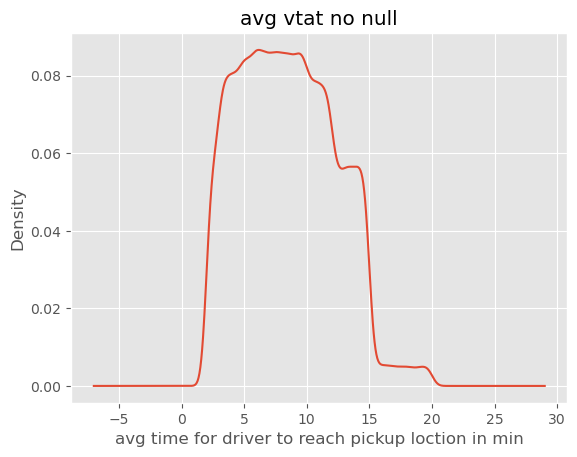

In [60]:
ax = df_vtat['avg_vtat'].plot(kind='kde', title='avg vtat no null')
ax.set_xlabel('avg time for driver to reach pickup loction in min')  # Y-axis: Density (probability density, area under curve = 1), KDE plot similar to histogram, but normalized

In [67]:
df_ctat = df[['avg_ctat']].dropna()

In [68]:
df_ctat.head()

,avg_ctat
1,14.0
2,25.8
3,28.5
4,19.6
5,18.1


<Axes: title={'center': 'hist of ctat'}, ylabel='Frequency'>

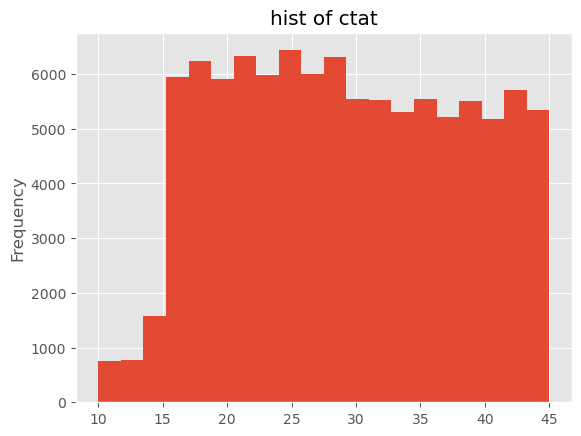

In [69]:
df_ctat['avg_ctat'].plot(kind = 'hist', bins=20, title = 'hist of ctat')

Text(0.5, 0, 'avg ctat')

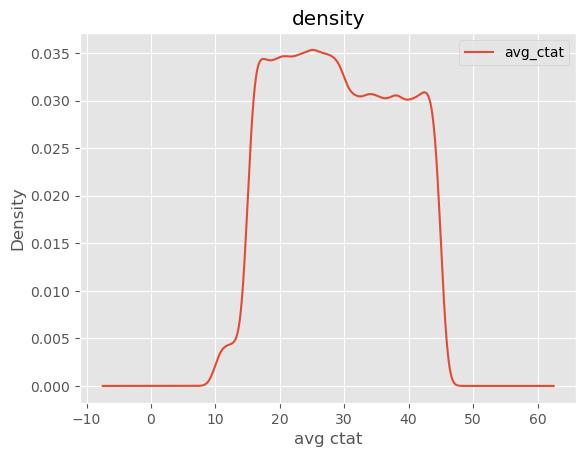

In [70]:
ax=df_ctat.plot(kind='kde', title = 'density')
ax.set_xlabel('avg ctat')

## Feature Relationship
 - Scatterplot
 - Heatmap Coorelation
 - Pairplot
 - Groupby comparison

In [61]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,none,0,none,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,none,0,none,0,NaN,737.0,48.21,4.1,4.3,UPI


## 2.5 Scatter plot

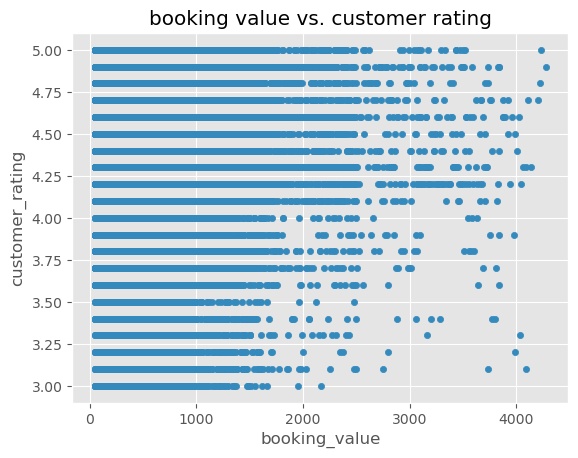

In [94]:
df.plot(kind='scatter', x='booking_value',  
        y='customer_rating', title='booking value vs. customer rating')
plt.show()

<Axes: xlabel='booking_value', ylabel='customer_rating'>

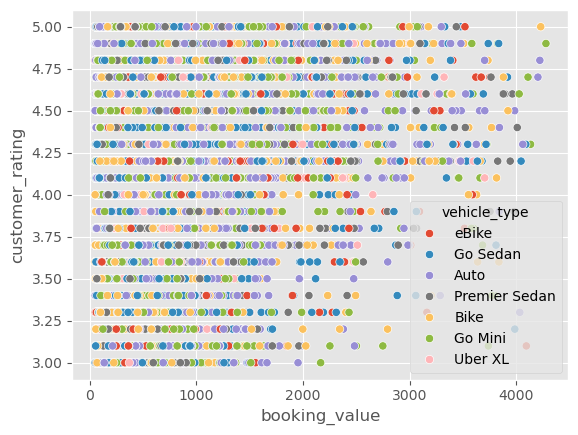

In [96]:
sns.scatterplot(data=df, x='booking_value', y='customer_rating', hue='vehicle_type')  # use another column as color

## 2.6 pairplot
 - scatter plot for each pair of list of variables provided
 - Pairplot can't work on string (categorical) columns, it generates scatter plots (numeric x numeric), Seaborn requires each variable to be numeric or datetime
 - can use string column as hue

In [97]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,none,0,none,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,none,0,none,0,NaN,737.0,48.21,4.1,4.3,UPI


In [105]:
df.dtypes

date                                 datetime64[ns]
time                                         object
booking_id                           string[python]
booking_status                       string[python]
customer_id                          string[python]
vehicle_type                         string[python]
pickup_location                      string[python]
drop_location                        string[python]
avg_vtat                                    float64
avg_ctat                                    float64
cancelled_rides_by_customer                   int64
reason_for_cancelling_by_customer    string[python]
cancelled_rides_by_driver                     int64
driver_cancellation_reason           string[python]
incomplete_rides                     string[python]
incomplete_rides_reason                      object
booking_value                               float64
ride_distance                               float64
driver_ratings                              float64
customer_rat

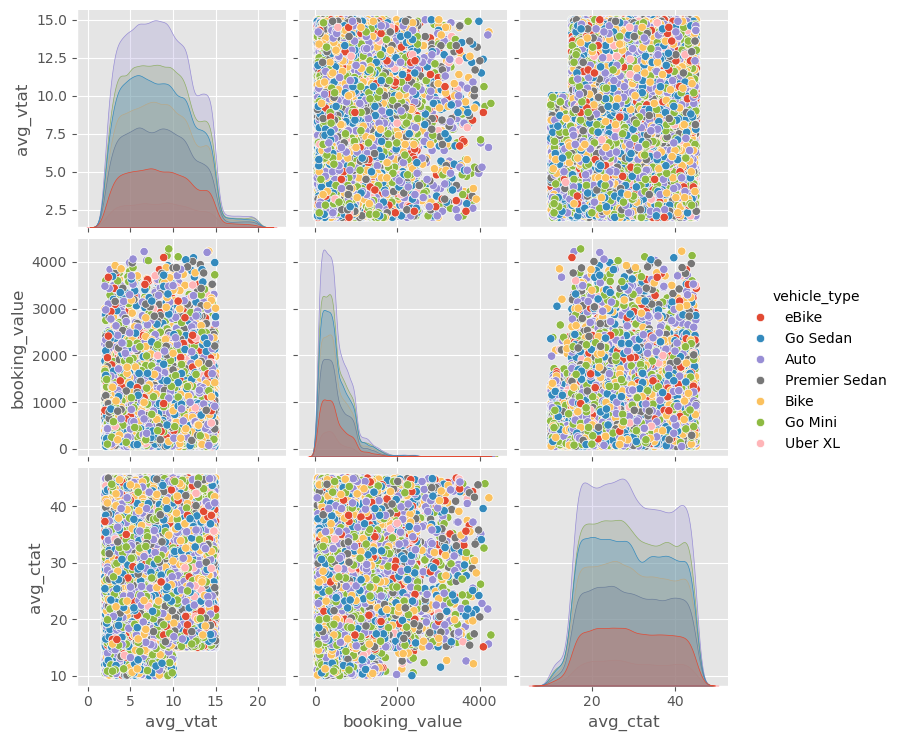

In [107]:
sns.pairplot(data=df,
             vars=['avg_vtat', 'booking_value', 'avg_ctat'], 
             hue='vehicle_type')

## 2.7 Correlation betw features
 - work on numeric values, dropna()
 - Pandas will automatically drop non-numeric values when doing corr()

In [108]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,none,0,none,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,none,0,none,0,NaN,737.0,48.21,4.1,4.3,UPI


In [111]:
df_corr = df[['avg_vtat', 'avg_ctat', 'booking_value', 'ride_distance']].dropna().corr()
df_corr

,avg_vtat,avg_ctat,booking_value,ride_distance
avg_vtat,1.000000,0.062454,0.002310,0.063018
avg_ctat,0.062454,1.000000,0.000267,0.101506
booking_value,0.002310,0.000267,1.000000,0.005129
ride_distance,0.063018,0.101506,0.005129,1.000000


## 2.8 Heatmap
 - how var related to other value
 - can feed the corr() to heatmap

<Axes: >

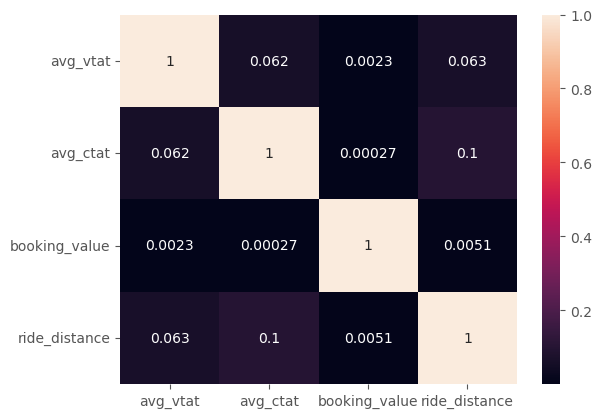

In [113]:
sns.heatmap(df_corr, annot=True)  # add annotation, can see the corrlation score for each pair

# 3 Answer Specific Questions

## 3.1 groupby and astype

3.1 What's the completion rate by vehicle type?

In [116]:
df['is_completed'] = (df['booking_status'] == 'Completed').astype(int)
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,is_completed
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card,1
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,none,0,none,0,NaN,416.0,34.02,4.6,5.0,UPI,1
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,none,0,none,0,NaN,737.0,48.21,4.1,4.3,UPI,1


In [117]:
df.groupby('vehicle_type')['is_completed'].mean()

vehicle_type
Auto             0.618654
Bike             0.623757
Go Mini          0.622682
Go Sedan         0.614465
Premier Sedan    0.621616
Uber XL          0.625283
eBike            0.619621
Name: is_completed, dtype: float64

In [121]:
completion_rate = df.groupby('vehicle_type')['is_completed'].mean().reset_index(name='completion_rate')

## 3.2 Multiple agg function

In [140]:
df.query('booking_status == "Completed"') \
    .groupby('vehicle_type') \
    .agg(
        avg_ride_distance = ('ride_distance', 'mean'), 
        total_ride_distance = ('ride_distance', 'sum') 
    ).reset_index()
    

,vehicle_type,avg_ride_distance,total_ride_distance
0,Auto,25.991699,597029.33
1,Bike,25.998178,361920.64
2,Go Mini,25.983068,478192.39
3,Go Sedan,25.984345,430040.91
4,Premier Sedan,25.972706,289803.45
5,Uber XL,25.744709,71184.12
6,eBike,26.344593,170712.96


In [131]:
df['booking_status'].value_counts()

booking_status
Completed                92248
Cancelled by Driver      26789
Cancelled by Customer    10402
No Driver Found          10401
Incomplete                8927
Name: count, dtype: Int64

In [135]:
df[df['booking_status'] != 'Completed'][['booking_id', 'booking_status','booking_value']].head()

,booking_id,booking_status,booking_value
0,"""CNR5884300""",No Driver Found,NaN
1,"""CNR1326809""",Incomplete,237.0
8,"""CNR4510807""",No Driver Found,NaN
9,"""CNR7721892""",Incomplete,135.0
11,"""CNR9551927""",No Driver Found,NaN


In [129]:
summary = ( 
    df.groupby('vehicle_type')
        .agg(
            total_bookings = ('booking_id', 'count'), 
            total_incomplete = ('incomplete_rides', 'count'),
            avg_distance = ('ride_distance', 'mean'),
            total_distance = ('ride_distance', 'sum') 
        )            
)

In [130]:
summary

,total_bookings,total_incomplete,avg_distance,total_distance
vehicle_type,,,,
Auto,37129,37129,24.614067,620717.54
Bike,22318,22318,24.649282,375630.41
Go Mini,29556,29556,24.611062,497094.23
Go Sedan,26934,26934,24.614009,447507.30
Premier Sedan,17950,17950,24.627661,300654.49
Uber XL,4422,4422,24.430910,73854.64
eBike,10458,10458,24.984536,177590.08


In [114]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,0,none,0,none,0,NaN,NaN,NaN,NaN,NaN,none
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,none,0,none,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,none,0,none,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,none,0,none,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,none,0,none,0,NaN,737.0,48.21,4.1,4.3,UPI


In [20]:
summary['ride_success_rate'] = 1-summary['total_incomplete'] /summary['total_bookings']

In [21]:
print(summary)

               total_bookings  total_incomplete  avg_distance  total_distance  \
vehicle_type                                                                    
Auto                    37419            2260.0     24.615996       625615.53   
Bike                    22517            1328.0     24.649546       378666.33   
Go Mini                 29806            1815.0     24.612090       501200.60   
Go Sedan                27141            1642.0     24.609325       450793.61   
Premier Sedan           18111            1063.0     24.598956       302936.14   
Uber XL                  4449             262.0     24.402893        74306.81   
eBike                   10557             630.0     24.990415       179456.17   

               ride_success_rate  
vehicle_type                      
Auto                    0.939603  
Bike                    0.941022  
Go Mini                 0.939106  
Go Sedan                0.939501  
Premier Sedan           0.941306  
Uber XL                 0

In [ ]:
import pandas as pd

# Example dataframe
# df = pd.read_csv('your_data.csv')

summary = (
    df.groupby('vehicle_type')
      .agg(
          total_bookings=('booking_id', 'count'),
          total_incomplete=('incomplete_rid', 'sum'),
          avg_distance=('ride_distance', 'mean'),
          total_distance=('ride_distance', 'sum')
      )
)

# Calculate ride success rate
summary['ride_success_rate'] = 1 - summary['total_incomplete'] / summary['total_bookings']

# Optional: reorder columns
summary = summary[['total_bookings', 'ride_success_rate', 'avg_distance', 'total_distance']]

print(summary)
